I will start from importing several Python libraries commonly used in machine learning, particularly when working with image data and TensorFlow. Here's a breakdown of each import statement

In [131]:
import matplotlib.pyplot as plt #module, which is commonly used for creating visualizations and plots.
import numpy as np #is widely used for numerical computations in Python.
import PIL #is used for opening, manipulating, and saving image files
import tensorflow as tf #is a popular open-source machine learning framework.


import pathlib #provides an object-oriented interface for working with filesystem paths.
from tensorflow import keras #is a high-level neural networks API.
from tensorflow.keras import layers # is commonly used to define the layers of a neural network.
from tensorflow.keras.models import Sequential #is used to create a linear stack of layers for building neural network models.
import random #provides functions for generating random numbers.
import os #provides a way to interact with the operating system, such as working with files and directories
from os import listdir #is used to get the list of files and directories in a specified directory.
from matplotlib.image import imread #is used to read image files into numpy arrays.
from pathlib import Path

**load and explore the dataset**[Loading Dataset](https://saturncloud.io/blog/how-to-import-files-from-google-drive-to-colab/)

This line of code will initiates the process of mounting Google Drive

In [132]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [133]:
path = "/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer"

In [134]:
data_dir = path

I then converted my variable path into a pathlib.Path object and then assigning it back to the variable path.
allowing me to perform various operations related to filesystem paths, such as joining paths, accessing individual components of a path, listing files in a directory

In [135]:
path = pathlib.Path(path)
path

PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer')

In [136]:
data_dir = path

I then calculated the total number of image files within my directory

In [137]:
image_count = len(list(path.glob('*/*.jpg')))
print(image_count)

15092


This path.glob will help me to retrieve specific character from my directory

In [138]:
list(path.glob('*/*.jpg'))[:5]

[PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4020.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_3992.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4006.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4017.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4010.jpg')]

In [139]:
brain_glioma= list(path.glob('brain_glioma/*'))
brain_glioma[:5]

[PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4020.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_3992.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4006.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4017.jpg'),
 PosixPath('/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma/brain_glioma_4010.jpg')]

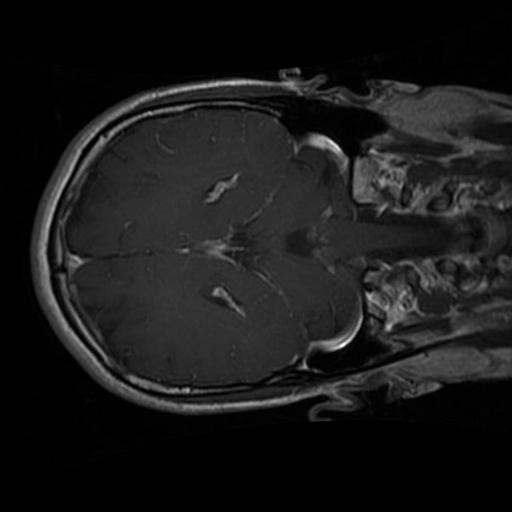

In [140]:
PIL.Image.open(str(brain_glioma[1]))

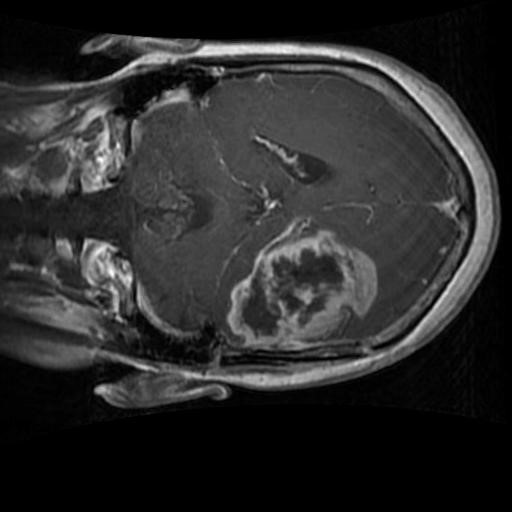

In [141]:
brain_glioma = list(path.glob('brain_glioma/*'))
PIL.Image.open(str(brain_glioma[0]))

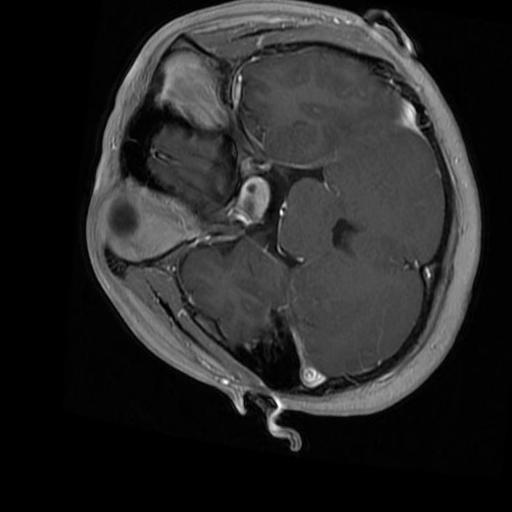

In [142]:
brain_tumor = list(path.glob('brain_tumor/*'))
PIL.Image.open(str(brain_tumor[0]))

**Load data using a Keras utility**[Load and preprocess images ](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb)

I created a 4x4 grid of subplots and displays 9 randomly chosen images from the specified directory. The dimensions of each image are shown as labels on the x and y axes

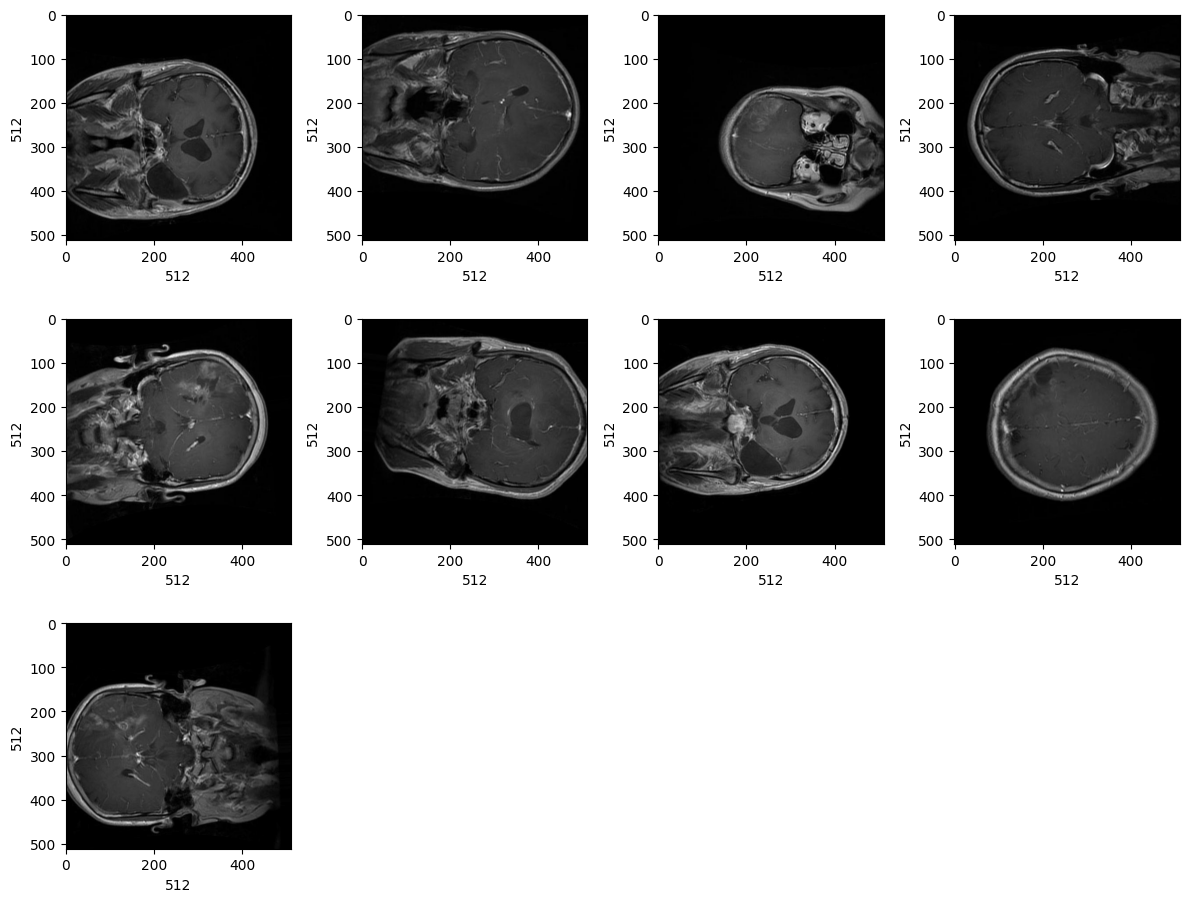

In [143]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_glioma"
for i in range(1,10):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

batch_size is set to 64, meaning that 64 images or data samples will be processed in each iteration during the training of a model.The height and width is set at 180 respectively

In [144]:
batch_size = 64
img_height = 224
img_width = 224

I specify that 20% of the dataset will be used for validation, with 80% used for training.

Seed=200: The random seed ensures that the split between training and validation sets is the same each time the code is run, which is critical for repeatability.

Image_size=(img_height, img_width): This field defines the size to which the image will be scaled(img_height = 180, img_width = 180).

Batch_size=batch_size: This parameter specifies the batch size for training.

In [145]:
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
  validation_split=0.2,
  subset="training",
  seed=200,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15092 files belonging to 3 classes.
Using 12074 files for training.


In [146]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=200,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15092 files belonging to 3 classes.
Using 3018 files for validation.


Let me print out the name of classes i have in my ds

In [147]:
class_names = train_ds.class_names

print (class_names)

['brain_glioma', 'brain_menin', 'brain_tumor']


**Visualize the data** To see resized image

The first five photographs from the first batch of the training dataset are displayed, together with the matching class labels, in a 3x3 grid of subplots that I generate. For improved visualization, the images are shown with thier axis labels.

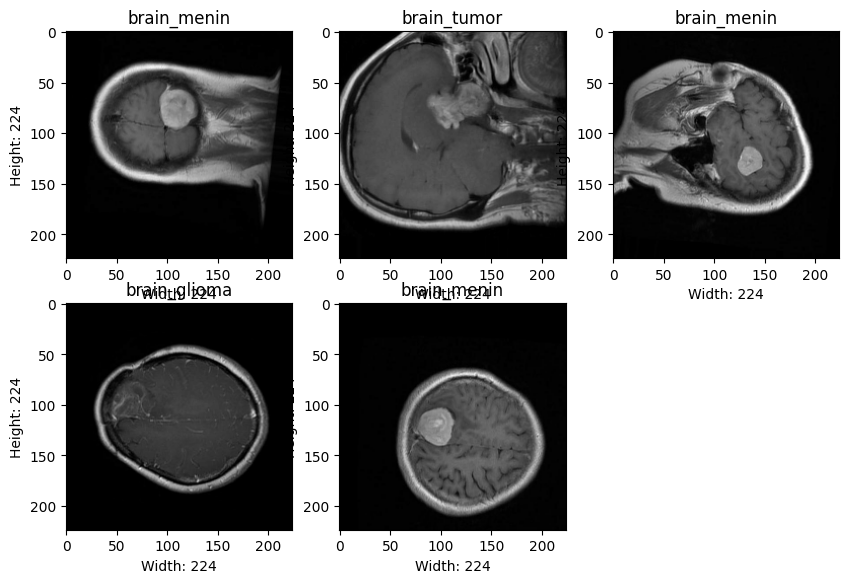

In [148]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")  # Set to "on" to display axis labels
    plt.xlabel("Width: {}".format(images[i].shape[1]))
    plt.ylabel("Height: {}".format(images[i].shape[0]))

I iterate over the batches of the training dataset (train_ds) using a loop.This will help me debugg and ensure that the data is being loaded in the expected format before training.

In [149]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64,)


I utilized caching to compress the massive datasets into memory, and prefetching will aid in overlapping the loading of data and model training, hence minimizing loading delays.

In [150]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Normalization the data**

This creates a Rescaling layer that will scale input values by a factor of 1./255. The purpose of this layer is to normalize pixel values in the input data. When images are represented as pixel values, they typically range from 0 to 255. Normalization is a common preprocessing step in deep learning, and dividing by 255 scales the pixel values to the range [0, 1].

In [151]:
normalization_layer = layers.Rescaling(1./255)

i visualized my rescaled image to see how it looks

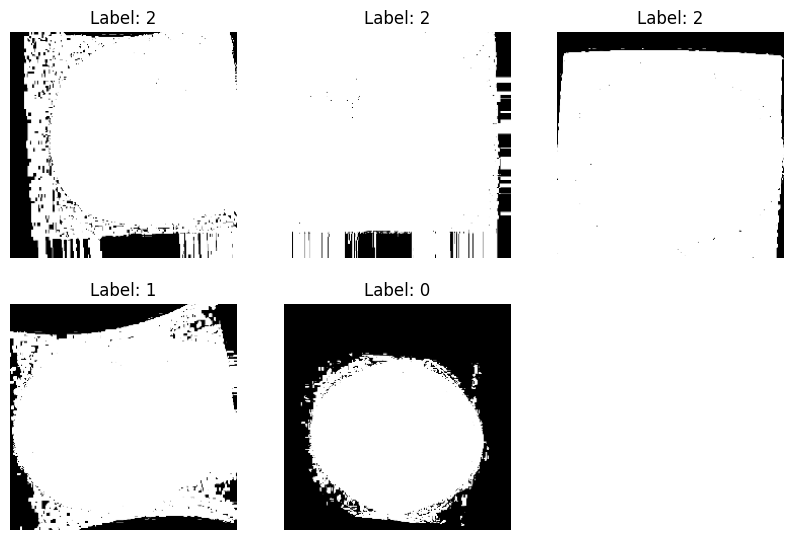

In [152]:
# In my train_ds rescaled dataset
for images, labels in train_ds.take(1):
    # Display the first 5 images along with their labels
    plt.figure(figsize=(10, 10))
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

In [153]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99691826


# Create the **model**

In [154]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(124, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the** **model**

In [155]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model summary**

In [156]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)       

**Train the model**

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
189/189 [==============================] - 17s 81ms/step - loss: 0.6349 - accuracy: 0.7149 - val_loss: 0.4444 - val_accuracy: 0.8247
Epoch 2/30
189/189 [==============================] - 11s 60ms/step - loss: 0.3864 - accuracy: 0.8517 - val_loss: 0.3715 - val_accuracy: 0.8592
Epoch 3/30
189/189 [==============================] - 11s 60ms/step - loss: 0.2763 - accuracy: 0.8914 - val_loss: 0.3084 - val_accuracy: 0.8774
Epoch 4/30
189/189 [==============================] - 11s 60ms/step - loss: 0.1716 - accuracy: 0.9347 - val_loss: 0.2013 - val_accuracy: 0.9245
Epoch 5/30
189/189 [==============================] - 11s 59ms/step - loss: 0.1153 - accuracy: 0.9583 - val_loss: 0.2173 - val_accuracy: 0.9271
Epoch 6/30
189/189 [==============================] - 11s 59ms/step - loss: 0.0689 - accuracy: 0.9745 - val_loss: 0.1613 - val_accuracy: 0.9414
Epoch 7/30
189/189 [==============================] - 11s 59ms/step - loss: 0.0446 - accuracy: 0.9832 - val_loss: 0.1843 - val_accuracy:

**Visualize training results**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [164]:
path = "/content/gdrive/MyDrive/brain tumor/Tumor_Dataset/brain_menin/100.png"
path

'/content/gdrive/MyDrive/brain tumor/Tumor_Dataset/brain_menin/100.png'

In [165]:

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This is an image that belongs to {} with a {:.2f} percent accuracy."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 134ms/step
This is an image that belongs to brain_tumor with a 100.00 percent accuracy.


In [167]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

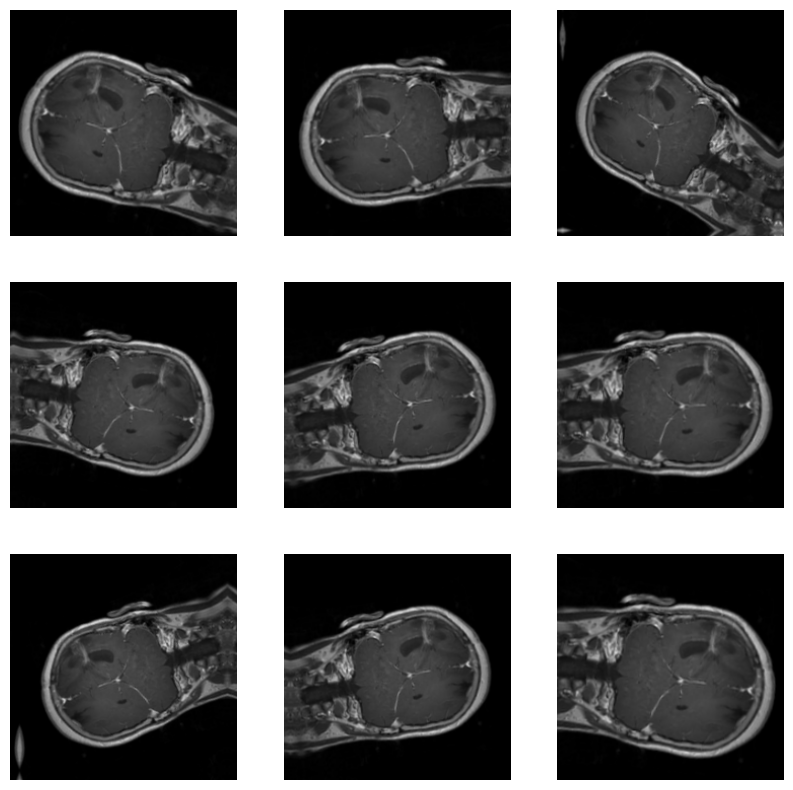

In [168]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [169]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [170]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [171]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
189/189 [==============================] - 17s 80ms/step - loss: 0.7123 - accuracy: 0.6774 - val_loss: 0.5481 - val_accuracy: 0.7714
Epoch 2/20
189/189 [==============================] - 15s 79ms/step - loss: 0.5281 - accuracy: 0.7845 - val_loss: 0.4423 - val_accuracy: 0.8366
Epoch 3/20
189/189 [==============================] - 15s 80ms/step - loss: 0.4186 - accuracy: 0.8332 - val_loss: 0.3827 - val_accuracy: 0.8529
Epoch 4/20
189/189 [==============================] - 15s 79ms/step - loss: 0.3537 - accuracy: 0.8585 - val_loss: 0.3208 - val_accuracy: 0.8794
Epoch 5/20
189/189 [==============================] - 15s 79ms/step - loss: 0.2909 - accuracy: 0.8854 - val_loss: 0.2303 - val_accuracy: 0.9155
Epoch 6/20
189/189 [==============================] - 15s 79ms/step - loss: 0.2643 - accuracy: 0.8977 - val_loss: 0.3173 - val_accuracy: 0.8585
Epoch 7/20
189/189 [==============================] - 15s 79ms/step - loss: 0.2301 - accuracy: 0.9067 - val_loss: 0.1901 - val_accuracy:

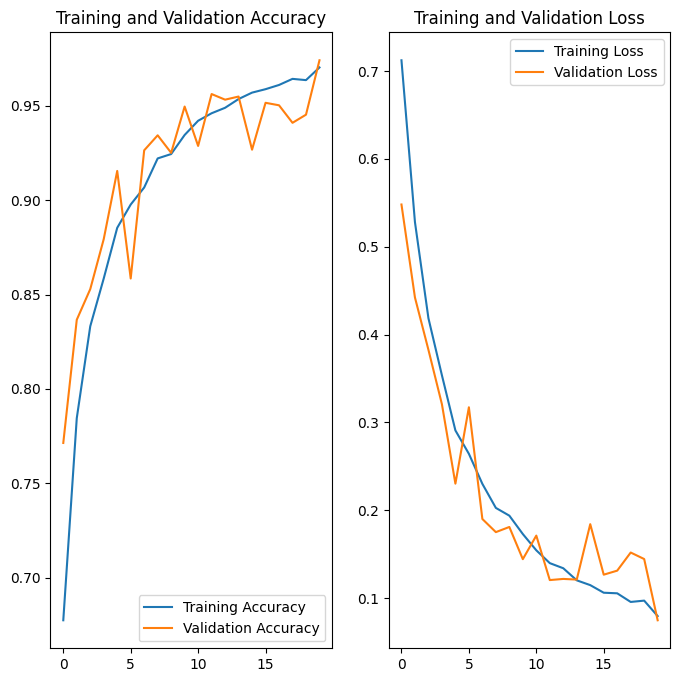

In [172]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print the total number of training and validation losses
print("Total Training Losses:", len(training_loss))
print("Total Validation Losses:", len(validation_loss))

# Plot the training and validation losses over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.show()

In [182]:
path = "/content/gdrive/MyDrive/brain tumor/Tumor_Dataset/brain_menin/101.png"

In [183]:

img = tf.keras.utils.load_img(
  path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to brain_tumor with a 99.97 percent confidence.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_dir = path

In [ ]:
# Set the path to create train and validation directories
#train_path = 'path/to/your/train/dataset'
#validation_path = 'path/to/your/validation/dataset'

In [ ]:
# Specify the percentage of data to use for validation
#validation_split = 0.2


In [ ]:
# Get the list of all files in the dataset directory
#all_files = os.listdir(data_dir)


In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
num_classes = len(class_names)

model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 30  # You can adjust this
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print the total number of training and validation losses
print("Total Training Losses:", len(training_loss))
print("Total Validation Losses:", len(validation_loss))

# Plot the training and validation losses over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
tf.keras.models.save_model(model,'my_model3.hdf5')

In [184]:
path = "/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_menin/brain_menin_0001.jpg"
path

'/content/gdrive/MyDrive/multi cancer/Brain tumour/Brain Cancer/brain_menin/brain_menin_0001.jpg'

In [185]:


img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This is an image that belongs to {} with a {:.2f} percent accuracy."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
This is an image that belongs to brain_menin with a 99.91 percent accuracy.
